To implement Logistic Regression, we will use Social Network Ads Dataset.<br><br>
It consists of 5 features: User ID, Gender, Age, Estimated Salary, Purchased. <br><br>
There are 4 independent variables: User ID, Gender, Age, Estimated Salary. <br><br>
The dependent variable is 'Purchased' which we will predict using two independent features 'Age' & 'Salary'.<br><br>
So, we have to predic whether a user will purchase the product or not.

### <b> Step 1: Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Datasets/Social_Network_Ads.csv')

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### <b> Step 2: Exploratory Analysis and Data Preprocessing

Checking for any null values

In [4]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

For our model, we do n ot require User ID and Gender column.<br>
So, we will drop them.

In [5]:
data = data.drop(['User ID', 'Gender'], axis=1)
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### <b> Step 2: Visualizing Correlation

<AxesSubplot:>

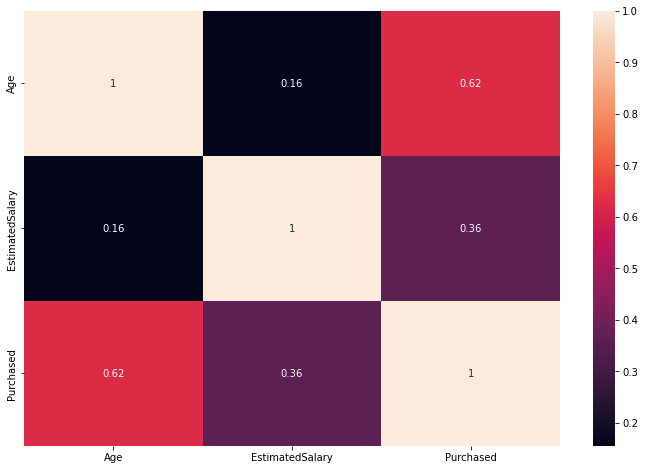

In [6]:
# To plot the correlation matrix, we use the heatmap function from seaborn.
# annot = True (for printing the values inside the square)
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

As we can see, Age and EstimatedSalary are correlated with the purchase.<br>
Based on this, our algorithm will use these two features to predict the purchase.

### <b> Step 4: Splitting the data

Input Data will have Age and Estimated Salary (Independent Variables)<br>
Output Data will have Purchased (Dependent Variables)

In [7]:
# Input Data
x = data[['Age', 'EstimatedSalary']]

# Output Data
y = data['Purchased']

In [8]:
# Verifying the split
print(x)
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


#### <b>Splitting the dataset into Train and Test

In [9]:
# splitting the dataset into Train and Test

from sklearn.model_selection import train_test_split

# split the training and testing data into 75% : 25% ratio
# to ensure consistency of data, assign any value to random_state
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=5)

# to know the shape of train and test data
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)
 

xtrain shape:  (300, 2)
xtest shape:  (100, 2)
ytrain shape:  (300,)
ytest shape:  (100,)


### <b> Step 5: Feature Scalling

Now, it is very important to perform feature scaling here because Age and Estimated Salary<br>
values lie in different ranges. If we don’t scale the features then Estimated Salary feature<br>
will dominate Age feature when the model finds the nearest neighbor to a data point in data space.

In [10]:
# Importing StandardScalar

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
 
print(xtrain[0:5])

[[ 0.77063564 -1.37090753]
 [-0.95681661 -0.74731782]
 [ 1.25048349 -1.37090753]
 [ 0.09884866  1.09375655]
 [-0.28502962 -0.56914934]]


Age and Estimated salary features values are scaled and now there in the -1 to 1. <br>
Hence, each feature will contribute equally in decision making i.e. making predictions. 

### <b> Step 5: Training the model

We will use Logistic Regression from sklearn to train our model and fit to it

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)

# Fitting LogsticRegression model to training model
model = model.fit(xtrain, ytrain)

### <b> Step 6: Predicting the test results

Once the model is trained, we use the the model.predict() to predict the values for the Test set and the values predicted are stored to the variable ypred.

In [17]:
ypred = model.predict(xtest)
ypred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

### <b> Step 7: Evaluating the model

Now we see the Accuracy of the trained model and plot the confusion matrix.<br>
The confusion matrix is a table that is used to show the number of correct and incorrect predictions<br>
on a classification problem when the real values of the Test Set are known.

In [23]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)
print("Accuracy: ", accuracy)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(ytest, ypred)
# print('Confusion Matrix: ''\n', cm) (Print Directly)
# OR make a dataframe
cm = pd.DataFrame(cm, index=['Age', 'EstimatedSalary'], columns=['Age', 'EstimatedSalary'])
print(cm)

Accuracy:  0.85
                 Age  EstimatedSalary
Age               60                6
EstimatedSalary    9               25


Out of 100:<br> 
TruePostive + TrueNegative =  60+ 25<br> 
FalsePositive + FalseNegative = 6 + 9<br>
<b> This CM tells us that 85 predictions were correct and 15 were incorrect, meaning the model has a high accuracy of 85%


#### <b> Visualizing the Confusion Matrix

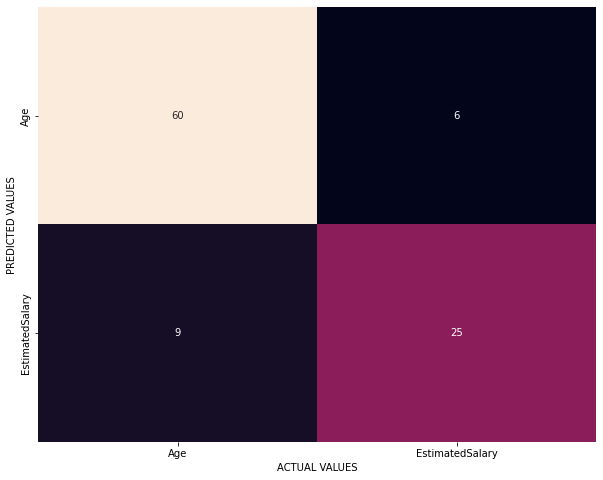

In [24]:
# Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.show()

<b> This CM tells us that 85 predictions were correct and 15 were incorrect, meaning the model has a high accuracy of 85%

### <b>Step 8: Visualizing the performance of our model

<b>  Visualizing the Training results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


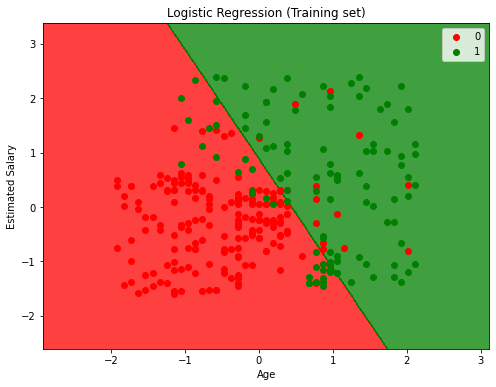

In [31]:
from matplotlib.colors import ListedColormap
xset, yset = xtrain, ytrain
X1, X2 = np.meshgrid(np.arange(start = xset[:, 0].min() - 1,
                               stop = xset[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xset[:, 1].min() - 1,
                               stop = xset[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(8, 6))

plt.contourf(X1, X2, model.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j, 0], xset[yset == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
     
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

This graph helps us see the clear correlations between the dependent and independent variables.<br><br>
We can see, as Age and Estimated Salary increase, each individual has a higher likelihood of being green(they will click on the ad).<br><br>
This graph makes a lot of sense because we can quickly tell that about 80-90% of the observations have been correctly identified.<br>
(There will almost always be some degree of error - or at least there should be, otherwise our model is probably guilty of overfitting)

<b>  Visualizing the Test results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


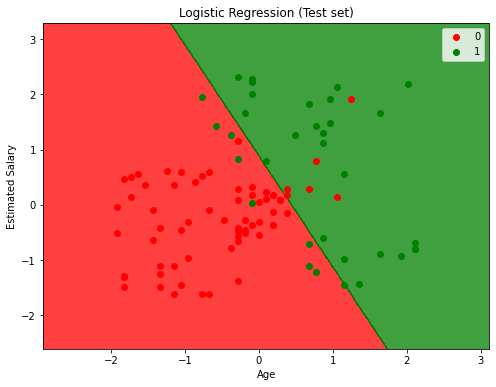

In [32]:
from matplotlib.colors import ListedColormap
xset, yset = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = xset[:, 0].min() - 1,
                               stop = xset[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xset[:, 1].min() - 1,
                               stop = xset[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(8, 6))

plt.contourf(X1, X2, model.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j, 0], xset[yset == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
     
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

This graph looks very similar to the last, but with fewer observations. We can literally count out the 11 mismatched individuals without even having to run the Confusion Matrix to determine the accuracy.<br><br>
We can be satisfied with this model as our final product. Our accuracy is high, but not so high that we need to be suspicious of any overfitting.<br><br>
<b> We can safely say that an increase in both Age and Estimated Salary will lead to a higher probability of clicking the advertisement.<br>As new users sign-up for the website, we can use this model to quickly determine whether or not to expose them to this particular ad or choose another that is more relevant to their profile.